In [1]:
# 공통 코드

# 파이썬
# ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 공통 모듈 임포트
import numpy as np
import pandas as pd
import os

# 깔끔한 그래프 출력을 위해 %matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
# 이미지를 저장할 디렉토리 생성
os.makedirs(IMAGES_PATH, exist_ok=True)

# 이미지 저장
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

from matplotlib import font_manager, rc
import platform

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
    
    
mpl.rcParams['axes.unicode_minus'] = False
# Jupyter Notebook의 출력을 소수점 이하 3자리로 제한
%precision 3

# 그래픽 출력을 좀 더 고급화하기 위한 라이브러리
import seaborn as sns

# 과학 기술 통계 라이브러리
import scipy as sp
from scipy import stats

# 사이킷런 ≥0.20 필수
# 0.20 이상 버전에서 데이터 변환을 위한 Transformer 클래스가 추가됨
import sklearn
assert sklearn.__version__ >= "0.20"

# 노트북 실행 결과를 동일하게 유지하기 위해 시드 고정
# 데이터를 분할할 때 동일한 분할을 만들어 냄
np.random.seed(21)


## 선형 회귀

### 정규 방정식

In [16]:
# 샘플 데이터 생성
np.random.seed(21)

# 100개의 독립 변수 생성
X= 2 * np.random.rand(100, 1)
# 100개의 종속 변수를 생성
# 일차식을 그대로 사용하면 너무 고정적이므로 잡음(random) 추가
y = 4 + 3 * X  + np.random.randn(100, 1)

# 모든 샘플에 1을 추가
X_b = np.c_[np.ones((100, 1)), X]

# 역행렬을 구하고(inv 함수) 행렬 곱셈(dot 함수)을 수행
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

# 결과 - 3.965(절편), 2.961(기울기)
print(theta_best) # 잡음 때문에 정확히 4, 3이 나오진 않음


[[3.965]
 [2.961]]


In [19]:
# 예측하기

X_new = np.array([[0], [1]])
# 위의 y 식의 x에 0, 1 을 넣었을 경우

X_new_b = np.c_[np.ones((2, 1)), X_new]
# 예측
y_pred = X_new_b.dot(theta_best)

print(y_pred)

[[3.965]
 [6.926]]


### 보스턴 주택 가격 예측 - 선형 회귀

In [22]:
# 데이터 가져오기
data_url = 'http://lib.stat.cmu.edu/datasets/boston'
row_df = pd.read_csv(data_url,sep = '\s+', skiprows = 22, header = None)

data = np.hstack([raw_df.values[::2, :], row_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

print(data[:5])
print(target[:5])

[[6.320e-03 1.800e+01 2.310e+00 0.000e+00 5.380e-01 6.575e+00 6.520e+01
  4.090e+00 1.000e+00 2.960e+02 1.530e+01 3.969e+02 4.980e+00]
 [2.731e-02 0.000e+00 7.070e+00 0.000e+00 4.690e-01 6.421e+00 7.890e+01
  4.967e+00 2.000e+00 2.420e+02 1.780e+01 3.969e+02 9.140e+00]
 [2.729e-02 0.000e+00 7.070e+00 0.000e+00 4.690e-01 7.185e+00 6.110e+01
  4.967e+00 2.000e+00 2.420e+02 1.780e+01 3.928e+02 4.030e+00]
 [3.237e-02 0.000e+00 2.180e+00 0.000e+00 4.580e-01 6.998e+00 4.580e+01
  6.062e+00 3.000e+00 2.220e+02 1.870e+01 3.946e+02 2.940e+00]
 [6.905e-02 0.000e+00 2.180e+00 0.000e+00 4.580e-01 7.147e+00 5.420e+01
  6.062e+00 3.000e+00 2.220e+02 1.870e+01 3.969e+02 5.330e+00]]
[24.  21.6 34.7 33.4 36.2]


In [23]:
# NUMPY 데이터를 데이터 프레임으로 변경
bostonDF = pd.DataFrame(data, columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX',
                            'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])
bostonDF['PRICE'] = target

print(bostonDF.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  


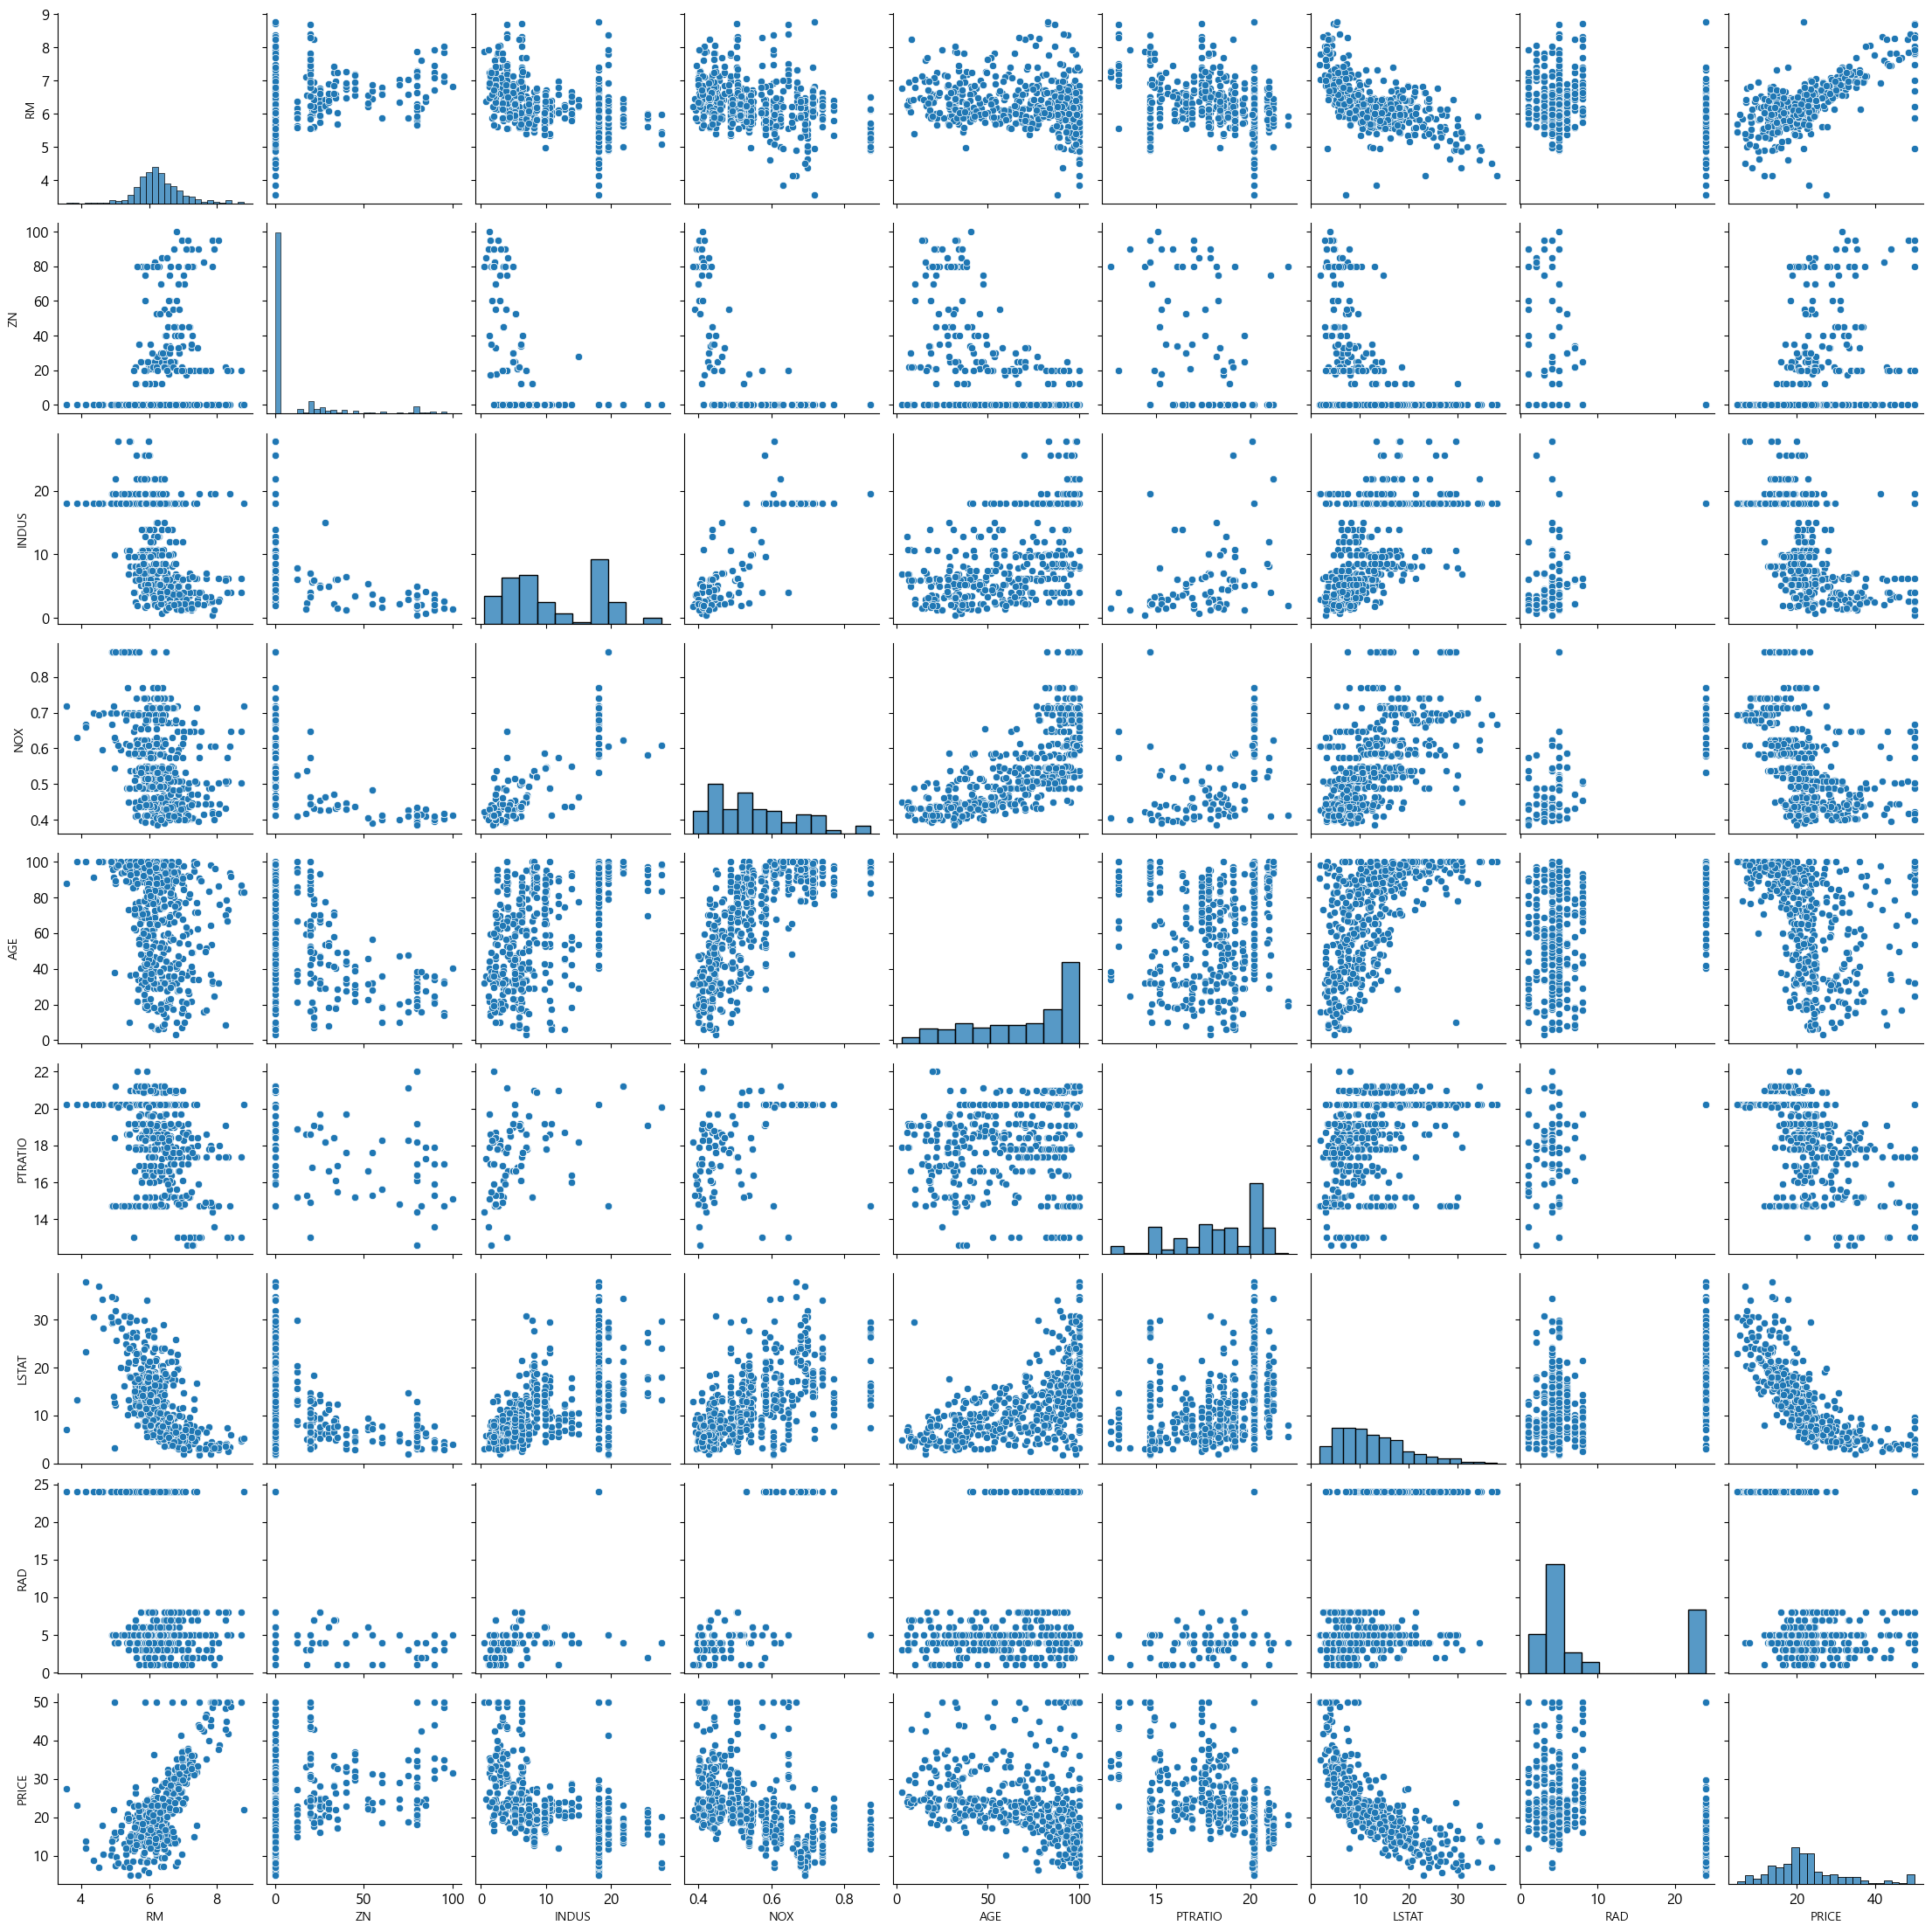

In [25]:
# 데이터의 상관 관계를 파악하려고 하는 열의 리스트
cols = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD', 'PRICE']

# 상관 관계 파악
#bostonDF[cols].corr() # 숫자 그래프
sns.pairplot(bostonDF[cols], height = 2.5) # 시각적 그래프로 파악
plt.show()

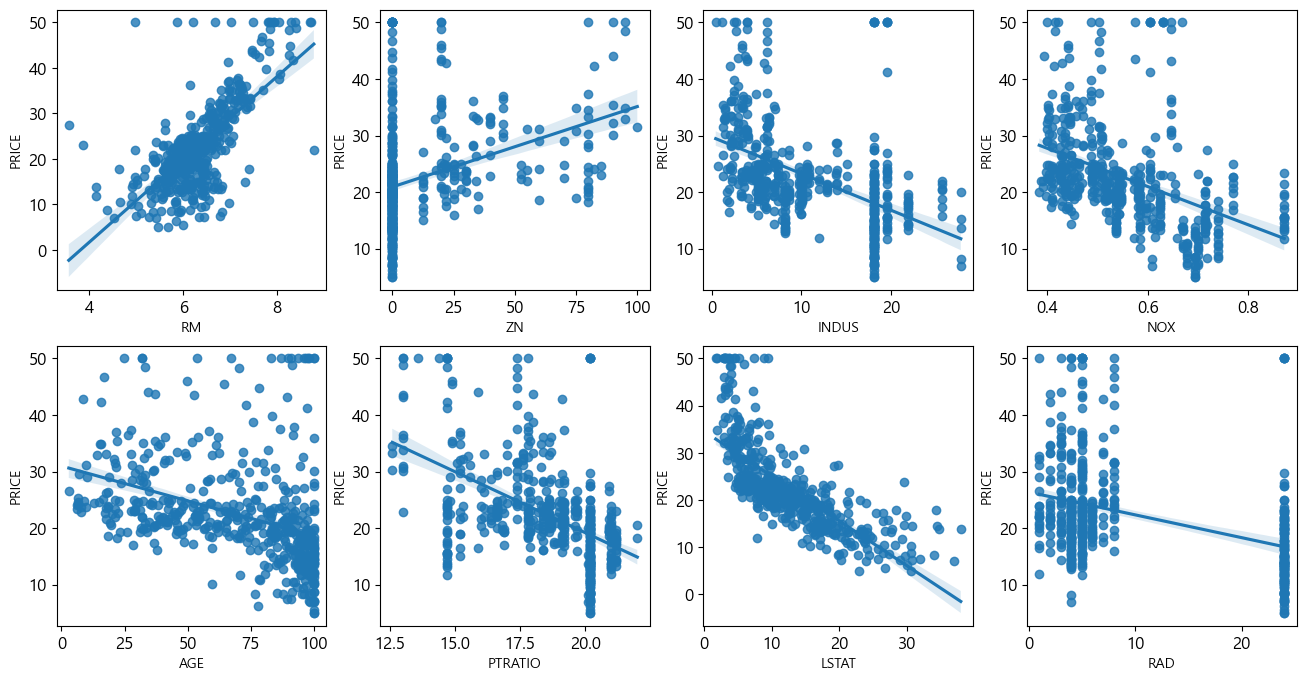

In [33]:
# 반복문의 y 자리만 다른 컬럼 이름으로 수정하면 그 컬럼과의 상관 관계를 파악할 수있음
fig, axes = plt.subplots(figsize = (16, 8), ncols = 4, nrows = 2)
# feature 선택
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']

for i, feature in enumerate(lm_features):
    row = int(i / 4)
    col = i % 4
    sns.regplot(x = feature, y = 'PRICE', data = bostonDF, ax = axes[row][col])

In [34]:
# RM 을 이용하여 PRICE 예측하기 - 단변량 회귀

from scipy import stats

# stats 모듈의 linregress 함수를 이용하면 기울기, 절편, 상관 계수 등을 리턴
slope, intercept, r_value, p_value, stderr = stats.linregress(bostonDF['RM'],
                                                            bostonDF['PRICE'])

print('기울기 : ', slope)
print('절편 : ', intercept)
print('상관 계수 : ', r_value)
print('불확실성 정도 : ', p_value)
print('방이 4개인 주택의 가격 : ', 4 * slope + intercept)
# p_value 가 e-74 로 나오는데 우연히 발생할 확률이 매우 낮다는 뜻
# 즉, 우연이 아니라 실제 상관 관계가 성립


기울기 :  9.102108981180306
절편 :  -34.67062077643854
상관 계수 :  0.695359947071539
불확실성 정도 :  2.487228871008377e-74
방이 4개인 주택의 가격 :  1.7378151482826851


In [37]:
# sklearn 을 이용한 단변량 회귀

from sklearn.linear_model import LinearRegression

slr = LinearRegression()
X = bostonDF[['RM']].values
y = bostonDF['PRICE'].values
slr.fit(X, y)

# 기울기가 배열로 리턴
print('기울기 : ', slr.coef_) # [9.102]
print('기울기 : ', slr.coef_[0]) # 9.1021
print('절편 : ', slr.intercept_) # -34.6706

기울기 :  [9.102]
기울기 :  9.10210898118031
절편 :  -34.67062077643857


In [38]:
# RANSACRegressor 클래스를 이용한 회귀

from sklearn.linear_model import RANSACRegressor

# linear regression 객체를 생성해서 사용
# 반복 횟수, loss 함수 등을 지정
ransac = RANSACRegressor(LinearRegression(),
                        max_trials = 100, min_samples = 50,
                        loss = 'absolute_error', residual_threshold = 5.0,
                        random_state = 21)
# 훈련
ransac.fit(X, y)

# 기울기와 절편이 estimator_ 안에 들어있음
# 이상치를 제거하는 방식이기에 이전의 단변량 회귀와 결과가 약간 다름
print('기울기 : ', ransac.estimator_.coef_[0]) # 9.5939
print('절편 : ', ransac.estimator_.intercept_) # -36.9805

기울기 :  9.593961671281097
절편 :  -36.98051497245669


### MSE 와 R2 을 이용한 성능 평가

In [41]:
from sklearn.model_selection import train_test_split

X = bostonDF[['RM']].values
y = bostonDF['PRICE'].values

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                    test_size = 0.3, random_state = 21)
slr = LinearRegression()
# 훈련
slr.fit(X_train, y_train)
# 예측
y_train_pred = slr.predict(X_train) # 훈련 데이터 예측
y_pred = slr.predict(X_test) # 테스트 데이터 예측

In [42]:
# MSE import
from sklearn.metrics import mean_squared_error
# R2 import
from sklearn.metrics import r2_score

# 제곱 오차가 더 작게 나온 경우 성능이 좋은 것
print('훈련 데이터의 평균 제곱 오차 : ', mean_squared_error(y_train, y_train_pred))
print('테스트 데이터의 평균 제곱 오차 : ', mean_squared_error(y_test, y_pred))
# 훈련 : 43.03
# 테스트 : 45.70

훈련 데이터의 평균 제곱 오차 :  43.03234679656094
테스트 데이터의 평균 제곱 오차 :  45.704676488542056


In [43]:
# R2 score 는 높을수록(1에 가까울수록) 성능이 좋은 것
print('훈련 데이터의 R2 score : ', r2_score(y_train, y_train_pred))
print('테스트 데이터의 R2 score : ', r2_score(y_test, y_pred))
# 훈련 : 0.459
# 테스트 : 0.522

훈련 데이터의 R2 score :  0.4594528867437301
테스트 데이터의 R2 score :  0.5220313749916078
